In [3]:
import pandas as pd

# Read the csv file http://localhost:8888/edit/Desktop/jupyter/sales_data.csv

In [4]:
sales_data = pd.read_csv('sales_data.csv')

In [5]:
sales_data.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
sales_data

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5.0,1500.40,5/8/2022,Kanyon
1,I317333,C111565,Shoes,3.0,1800.51,12/12/2021,Forum Istanbul
2,I127801,C266599,Clothing,1.0,300.08,9/11/2021,Metrocity
3,I173702,C988172,Shoes,5.0,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4.0,60.60,24-10-2021,Kanyon
...,...,...,...,...,...,...,...
99457,I337046,C189076,Books,4.0,60.60,24-10-2021,Kanyon
99458,I170504,C226974,Books,1.0,15.15,28-02-2023,Zorlu Center
99459,I170504,C226974,Books,1.0,15.15,28-02-2023,Zorlu Center
99460,I152790,C223470,Cosmetics,4.0,162.64,26-07-2021,Mall of Istanbul


# Display unique values for category variable then count it

In [7]:
print(sales_data['category'].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [8]:
print(sales_data['category'].nunique())

8


In [9]:
sales_data.category.value_counts()

Clothing           34487
Cosmetics          15098
Food & Beverage    14776
Toys               10088
Shoes              10034
Souvenir            4999
Technology          4996
Books               4984
Name: category, dtype: int64

# Data cleaning

In [10]:
# Check for missing values
print(sales_data.isnull().sum())

invoice_no       0
customer_id      0
category         0
quantity         1
price            1
invoice_date     0
shopping_mall    0
dtype: int64


In [11]:
Q1 = sales_data['price'].quantile(0.25)
Q3 = sales_data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1154.87


In [12]:
# Filter outliers
lowerFence=Q1-1.5*IQR
UpperFence=Q3+1.5*IQR
FilteredDF=sales_data[(sales_data.price>=lowerFence)&(sales_data.price<=UpperFence)]

In [13]:
sales_data.fillna(method="ffill",inplace=True)

In [14]:
sales_data.isnull().sum()

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64

In [15]:
#duplicates
sales_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99457     True
99458     True
99459     True
99460     True
99461     True
Length: 99462, dtype: bool

In [16]:
sales_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
99457     True
99458     True
99459     True
99460     True
99461     True
Length: 99462, dtype: bool>

# Display columns where quantity is greater than 4

In [17]:

print(sales_data[(sales_data['quantity']>4)][['category','quantity','price']])

              category  quantity    price
0             Clothing       5.0  1500.40
3                Shoes       5.0  3000.85
5             Clothing       5.0  1500.40
15               Shoes       5.0  3000.85
23          Technology       5.0  5250.00
...                ...       ...      ...
99436         Clothing       5.0  1500.40
99438             Toys       5.0   179.20
99445  Food & Beverage       5.0    26.15
99451             Toys       5.0   179.20
99452         Souvenir       5.0    58.65

[19990 rows x 3 columns]


# Display maximum price

In [19]:
print(sales_data['price'].max())

5250.0


# Add new column TotalAmount

In [20]:
sales_data['TotalAmount'] = sales_data['quantity'] * sales_data['price'] 

In [56]:
sales_data

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,TotalAmount
0,I138884,C241288,Clothing,5.0,1500.40,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Shoes,3.0,1800.51,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Clothing,1.0,300.08,9/11/2021,Metrocity,300.08
3,I173702,C988172,Shoes,5.0,3000.85,16-05-2021,Metropol AVM,15004.25
4,I337046,C189076,Books,4.0,60.60,24-10-2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...
99457,I337046,C189076,Books,4.0,60.60,24-10-2021,Kanyon,242.40
99458,I170504,C226974,Books,1.0,15.15,28-02-2023,Zorlu Center,15.15
99459,I170504,C226974,Books,1.0,15.15,28-02-2023,Zorlu Center,15.15
99460,I152790,C223470,Cosmetics,4.0,162.64,26-07-2021,Mall of Istanbul,650.56


# Visualize using pie chart 

<Axes: ylabel='price'>

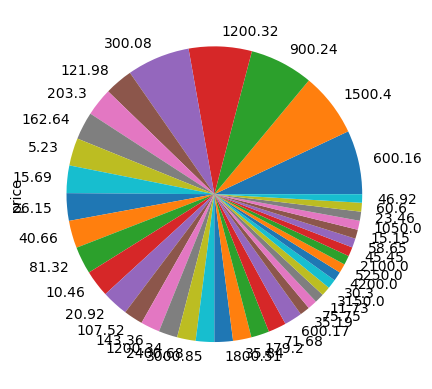

In [60]:
sales_data.price.value_counts().plot(kind="pie")